# Test Similarity Search Algorithm

This notebook performs a bsic check to see plots of the knn results



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from joblib import dump, load


In [3]:
sys.path.append('../src')
import utils
import settings

In [4]:
def plot_similar_images(j, df, labels, features_list, clf, clf_func, show_plots=True, save_figures=False):
    """
    j: index (of labels list) to look up
    df: df with image metadata
    labels: true labels. list with the object ids for all the images
    features_list: list of numpy arrays with the extracted features
    """
    
    # look up true image
    true_label = labels[j]
    true_metadata = df.loc[true_label,:]

    # look up similar images
    distances, indices = clf_func([features_list[j]])
    object_ids = labels[indices.tolist()[0]]
    tdf = df.loc[object_ids,:]
    
    # plot results
    num_plots = min(tdf.shape[0], 10)
    fig, axs = plt.subplots(nrows=1+num_plots,ncols=1,figsize=(8,int(num_plots*4)))

    # show true image
    axs[0].set_title('original image: ' + true_metadata['title'], fontdict={'fontweight' : 750} )
    # axs[0].axis('off')
    im = plt.imread(true_metadata['img_path'])
    axs[0].imshow(im)
    axs[0].spines['bottom'].set_visible(True)
    axs[0].spines['bottom'].set_linewidth(3)

    # show similar images
    for i, (idx, row) in enumerate(tdf.iterrows()):

        axs[i+1].set_title(str(i+1) + ': ' + row['title'])
        im = plt.imread(row['img_path'])
        axs[i+1].axis('off')
        axs[i+1].imshow(im)

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    for sp_name in axs[0].spines:

        axs[0].spines[sp_name].set_visible(True)
        axs[0].spines[sp_name].set_linewidth(3)

    fig.tight_layout()
    if show_plots:
        plt.show()
    
    if save_figures:
        fldr = os.path.join("..","models","search", clf.serial_num, "test_images")
        if not os.path.exists(fldr):
            os.makedirs(fldr)
            
        fig_fname = '{}: {}.png'.format(j, true_metadata['title'])
        fig_fpath= os.path.join(fldr, fig_fname)
        fig.savefig(fig_fpath)
        
    _ = [print(str(i+1),': ', row['detail_url']) for i, (idx, row) in enumerate(tdf.iterrows())]
    
    return object_ids, true_metadata

In [2]:
def plot_list_of_images(fpaths,labels=None):

    # plot results
    num_plots = len(fpaths)
    fig, axs = plt.subplots(nrows=1+num_plots,ncols=1,figsize=(8,int(num_plots*4)))

    # show true image
    axs[0].set_title('original image', fontdict={'fontweight' : 750} )
    # axs[0].axis('off')
    im = plt.imread(fpaths[0])
    axs[0].imshow(im)
    axs[0].spines['bottom'].set_visible(True)
    axs[0].spines['bottom'].set_linewidth(3)

    # show similar images
    for i, fpath in enumerate(fpaths):

        axs[i+1].set_title(str(i+1) + ': ')
        im = plt.imread(fpath)
        axs[i+1].axis('off')
        axs[i+1].imshow(im)

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    for sp_name in axs[0].spines:

        axs[0].spines[sp_name].set_visible(True)
        axs[0].spines[sp_name].set_linewidth(3)

    fig.tight_layout()
    plt.show()
    
    return

# Load Data

In [5]:
labels, features_list  = utils.load_features(fpath=settings.features_fpath)

In [6]:
labels[:5]

array(['../data/processed/eth_material_archive/material_1000_0.jpg',
       '../data/processed/eth_material_archive/material_1001_0.jpg',
       '../data/processed/eth_material_archive/material_1002_0.jpg',
       '../data/processed/eth_material_archive/material_1003_0.jpg',
       '../data/processed/eth_material_archive/material_1004_0.jpg'],
      dtype='<U63')

In [7]:
# reload model


clf_fpath = os.path.join(settings.search_model_fldr_path,"NearestNeighbors10.joblib")
clf = load(clf_fpath)

In [8]:
clf.__dict__

{'n_neighbors': 10,
 'radius': 1.0,
 'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'name': 'NearestNeighbors10',
 'created': '202103142101',
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 'n_features_in_': 512,
 '_fit_method': 'brute',
 '_fit_X': array([[-0.23576723, -0.3130666 , -0.3130666 , ..., -0.3130666 ,
          1.2864486 , -0.3130666 ],
        [-0.04388988, -0.32695261, -0.32695261, ..., -0.32695261,
          1.30699289, -0.32695261],
        [ 0.02993901, -0.34462175, -0.34462175, ..., -0.34462175,
          1.37182486, -0.34462175],
        ...,
        [-0.20105641, -0.35245436, -0.22858635, ..., -0.35245436,
          1.2547102 , -0.35245436],
        [ 0.53959095, -0.38538274, -0.22614911, ..., -0.34798223,
          1.58530557, -0.38538274],
        [-0.08468995, -0.34050316, -0.24702993, ..., -0.34050316,
          1.06049883, -0.34050316]]),
 'n_samples_fit_': 1028,
 '_tree': N

In [12]:
 labels[5]

'../data/processed/eth_material_archive/material_1005_0.jpg'

In [19]:
# look up similar images
distances, indices = clf.kneighbors([features_list[10]])
object_ids = labels[indices.tolist()[0]]


In [20]:
object_ids

array(['../data/processed/eth_material_archive/material_1010_0.jpg',
       '../data/processed/eth_material_archive/material_1021_0.jpg',
       '../data/processed/eth_material_archive/material_896_0 copy.jpg',
       '../data/processed/eth_material_archive/material_896_0.jpg',
       '../data/processed/eth_material_archive/material_1025_0.jpg',
       '../data/processed/eth_material_archive/material_1676_0.jpg',
       '../data/processed/eth_material_archive/material_1601_0.jpg',
       '../data/processed/eth_material_archive/material_1866_0.jpg',
       '../data/processed/eth_material_archive/material_1022_0.jpg',
       '../data/processed/eth_material_archive/material_578_0.jpg'],
      dtype='<U63')

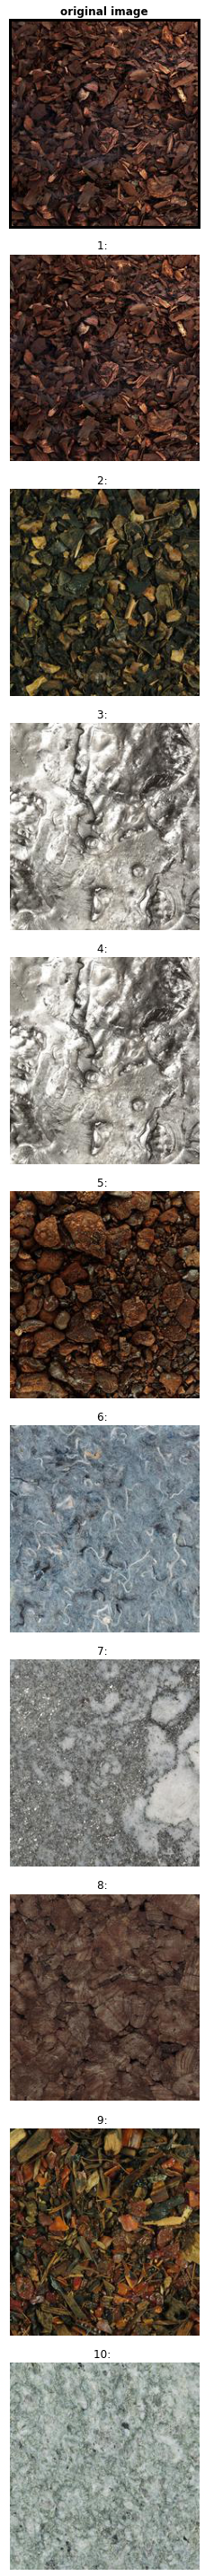

In [21]:
plot_list_of_images(object_ids.tolist())